In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

states = pd.read_csv('states_all.csv')
states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [2]:
states['GRADES_4_G_non_null'] = states.GRADES_4_G.dropna()
states['GRADES_4_G_non_null'].dropna()[98]

73824.0

In [3]:
grades_4th = []
grades_8th = []
grades_12th = []
averages = []


for value in range(0,1632):
  grades_4th.append(states.GRADES_4_G.dropna()[value])
print(len(grades_4th))

for value in range(0,1632):
  grades_8th.append(states.GRADES_8_G.dropna()[value])
print(len(grades_8th))

for value in range(0,1632):
  grades_12th.append(states.GRADES_12_G.dropna()[value])
print(len(grades_12th))

for value in range(0,1632):
  averages.append( (grades_4th[value] + grades_8th[value]  + grades_12th[value]   ) / 3  )
print(len(averages))

1632
1632
1632
1632


In [4]:
averages = pd.DataFrame(averages)
averages.columns = ['AVG_OF_3_GRADES']
states['AVG_OF_3_GRADES'] = averages['AVG_OF_3_GRADES']
states['AVG_OF_3_GRADES']

0        52380.000000
1         8417.000000
2        47308.000000
3        32764.666667
4       350796.333333
            ...      
1710              NaN
1711              NaN
1712              NaN
1713              NaN
1714              NaN
Name: AVG_OF_3_GRADES, Length: 1715, dtype: float64

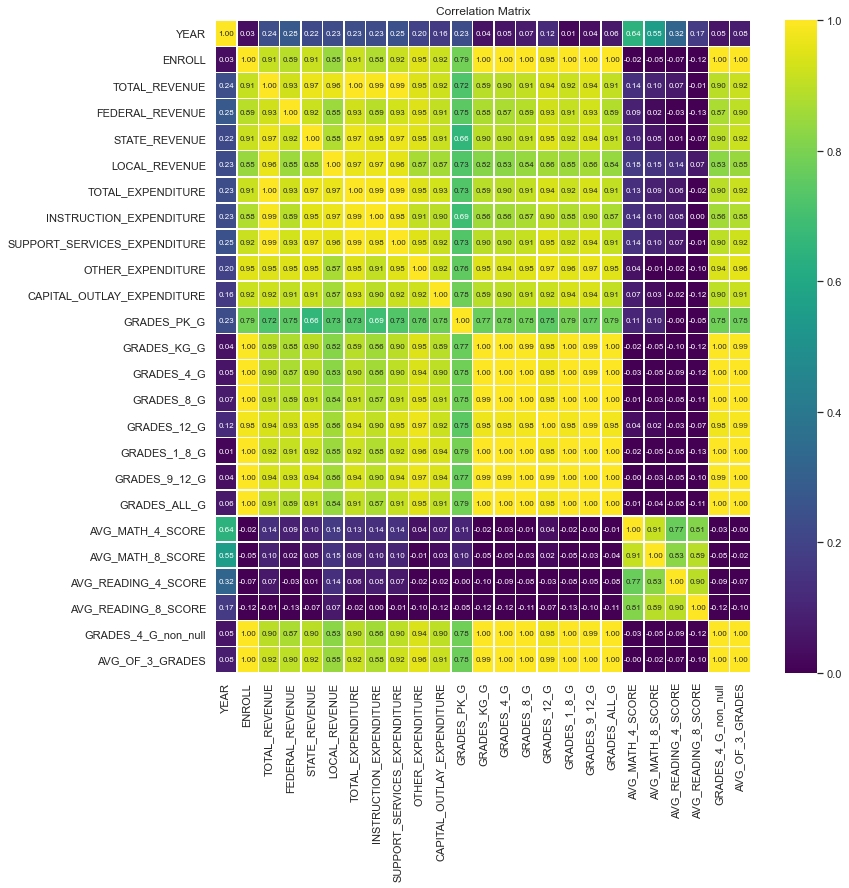

In [5]:
correlation = states.corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation, annot=True, fmt='.2f', annot_kws={"size": 8}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

In [6]:
#So the Other Expenditures has the most correlation between the our variable than the other expenditures.

In [7]:
states_df = pd.DataFrame()
states_df['TOTAL_EXPENDITURE'] = states['TOTAL_EXPENDITURE']
states_df['INSTRUCTION_EXPENDITURE'] = states['INSTRUCTION_EXPENDITURE']
states_df['SUPPORT_SERVICES_EXPENDITURE'] = states['SUPPORT_SERVICES_EXPENDITURE']
states_df['OTHER_EXPENDITURE'] =  states['OTHER_EXPENDITURE']
states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TOTAL_EXPENDITURE             1275 non-null   float64
 1   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 2   SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 3   OTHER_EXPENDITURE             1224 non-null   float64
dtypes: float64(4)
memory usage: 53.7 KB


In [8]:
states_df=states_df.select_dtypes(exclude='object')
states_df.dropna(inplace=True)
states_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 51 to 1274
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TOTAL_EXPENDITURE             1224 non-null   float64
 1   INSTRUCTION_EXPENDITURE       1224 non-null   float64
 2   SUPPORT_SERVICES_EXPENDITURE  1224 non-null   float64
 3   OTHER_EXPENDITURE             1224 non-null   float64
dtypes: float64(4)
memory usage: 47.8 KB


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = states_df.values
X = StandardScaler().fit_transform(states_df)
pca = PCA(n_components=4)
principalComponents=pca.fit_transform(X)

exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[9.71355694e-01 2.46874518e-02 3.49316153e-03 4.63692535e-04]
[ 97.14  99.61  99.96 100.01]


Text(0, 0.5, '% of Variance Explained')

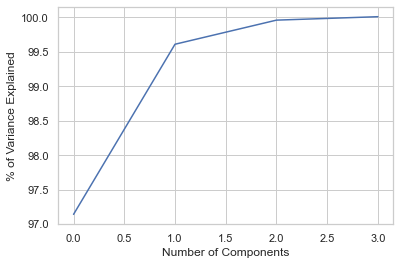

In [10]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')

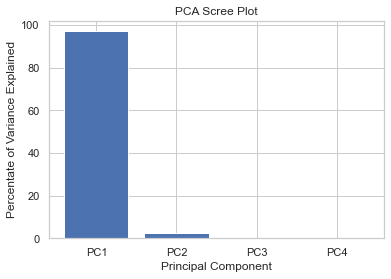

In [11]:
# Scree Plot
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4']
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [12]:
X = pd.DataFrame(X, columns=states_df.columns)
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig = plt.figure(figsize=(12,6), dpi=100)
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

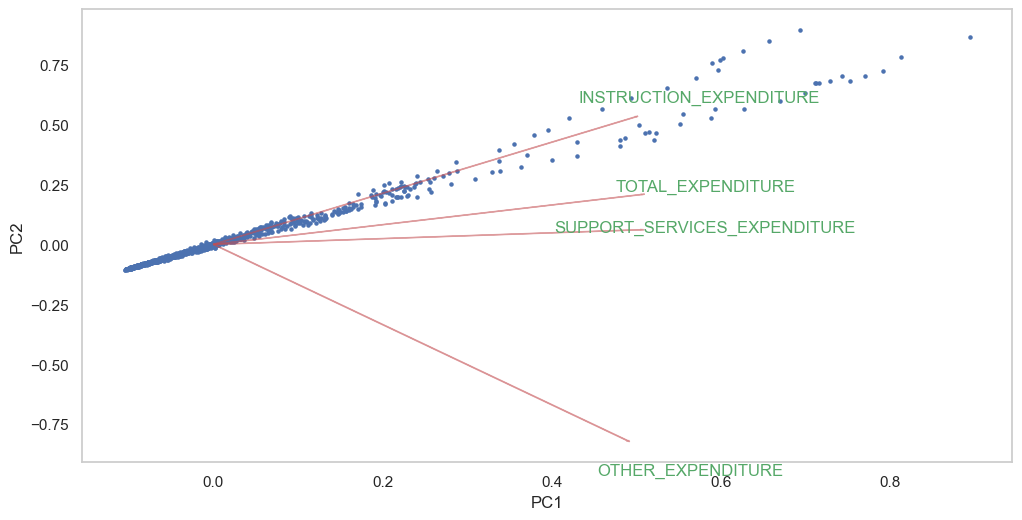

In [13]:
myplot(np.array(X)[:,0:2],np.transpose(pca.components_[0:2, :]),list(X.columns))
plt.show()

In [14]:
#Question4
states_df['GPA'] = averages['AVG_OF_3_GRADES']
states_df.corr()

,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,GPA
TOTAL_EXPENDITURE,1.000000,0.991252,0.993262,0.946084,0.920441
INSTRUCTION_EXPENDITURE,0.991252,1.000000,0.976643,0.909262,0.884778
SUPPORT_SERVICES_EXPENDITURE,0.993262,0.976643,1.000000,0.953109,0.924639
OTHER_EXPENDITURE,0.946084,0.909262,0.953109,1.000000,0.960169
GPA,0.920441,0.884778,0.924639,0.960169,1.000000


In [15]:
# Based on the correlation between that is shown in the last question, the expenditures look like the most appropriate variables for my model